# Project: Witcher Connections

## 1. Introduction:

This project aims to have a look at the connections between different characters of the Witcher franchise

1. How the network looks like?
2. If there are any communities present?
3. Which is the most important character based on degree centrality and betweenness centrality?

## 2. Description of the dataset:

The dataset used in the project - https://www.kaggle.com/datasets/avasadasivan/witcher-network/data. This dataset contains the links between characters of the Witcher franchise.

## 3. Methods

The methods used are further defined below.

In [78]:
!pip install python-igraph
!pip install matplotlib

### Structure of the network

After loading the dataset, the structure is given. We can see that there are a lot of connections between the characters, with the amount of connections reducing as the character importance reduces. Two characters do not have any links with any of the other characters at all.

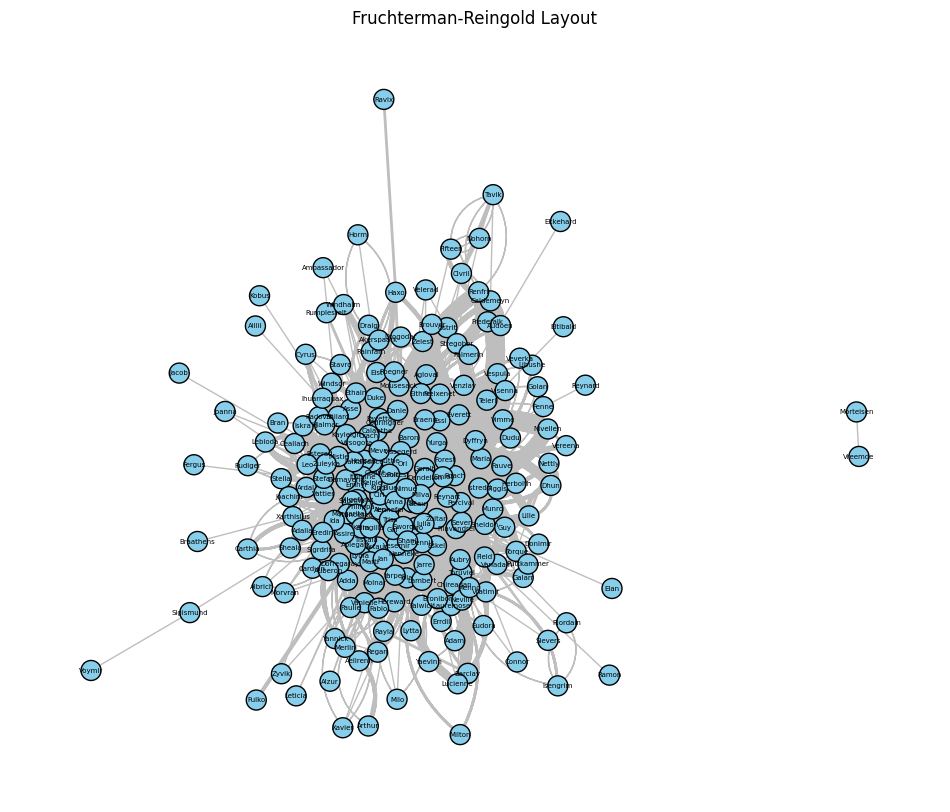

In [79]:
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt

data = pd.read_csv('/content/witcher_network.csv')

g = ig.Graph()

g.add_vertices(pd.concat([data['Source'], data['Target']]).unique())

edges = [(row['Source'], row['Target'], row['Weight']) for _, row in data.iterrows()]
g.add_edges([(row[0], row[1]) for row in edges])
g.es['weight'] = [row[2] for row in edges]

layout_fr = g.layout_fruchterman_reingold(niter=1000, start_temp=0.1)

fig, ax = plt.subplots(figsize=(12, 10))

ax.clear()
ig.plot(g, layout=layout_fr, target=ax,
        vertex_size=20, vertex_label_size=5,
        edge_width=g.es['weight'], vertex_color='skyblue',
        edge_color='gray',
        vertex_label=g.vs['name'])
plt.title("Fruchterman-Reingold Layout")
plt.show()




### Presence of communities

There are several communities present which are coloured in the graph as below.

<ipython-input-80-1709bfb199a4>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [plt.cm.get_cmap("tab20")(i / len(set(membership))) for i in membership]


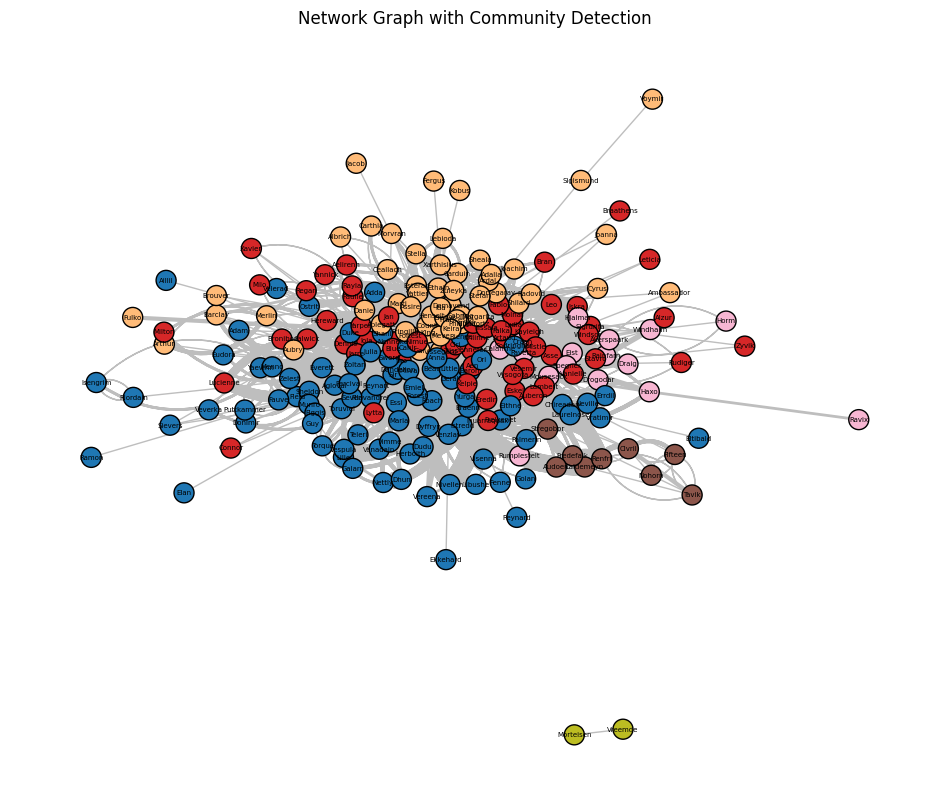


Communities Detected:
Community 1: Velerad, Geralt, Adda, Ostrit, Roach, Nivellen, Fenne, Vereena, Libushe, Baron, Sir, Nettly, Dhun, Lille, Torque, Galarr, Vanadain, Toruviel, Filavandrel, Field, Chireadan, Errdil, Vratimir, Beau, Laurelnose, Neville, Istredd, Herbolth, Seven, Vespula, Dandelion, Dudu, Vimme, Little, Sword, Agloval, Teleri, Essi, Duke, Zelest, Veverka, Braenn, Freixenet, Eithné, Venzlav, Yurga, Visenna, Sheldon, Donimir, Rience, Ori, Forest, Everett, Shani, Ekkehard, Codringher, Yaevinn, Anna, Fauve, Menno, Cahir, Milva, Maria, Zoltan, Percival, Munro, Figgis, Emiel, Dyffryn, Golan, Julia, Reynart, Reynard, Palmerin, Guy, Adam, Puttkammer, Isengrim, Elan, Sievers, Riordain, Eudora, Eltibald, Ramon, Aillil
Community 2: Foltest, Vissegerd, King, Count, Gar, Henselt, Philippa, Meve, Ethain, Emhyr, Aplegatt, Demavend, Sabrina, Margarita, Carduin, Francesca, Marti, Dorregaray, Keira, Sigismund, Esterad, Morvran, Ardal, Vattier, Xarthisius, Ceallach, Shilard, Stefan, Assir

In [80]:
community = g.community_multilevel(weights=g.es['weight'])


membership = community.membership

colors = [plt.cm.get_cmap("tab20")(i / len(set(membership))) for i in membership]

layout = g.layout_fruchterman_reingold(niter=1000, start_temp=0.1)

fig, ax = plt.subplots(figsize=(12, 10))

ax.clear()
ig.plot(g, layout=layout, target=ax,
        vertex_size=20, vertex_label_size=5,
        edge_width=g.es['weight'], vertex_color=colors,
        edge_color='gray',
        vertex_label=g.vs['name'])

plt.title("Network Graph with Community Detection")
plt.show()

print("\nCommunities Detected:")
for idx, comm in enumerate(community):
    print(f"Community {idx+1}: {', '.join([g.vs[i]['name'] for i in comm])}")


### The most important character

We first separate out the top 10 most important characters based on degree centrality and betweenness centrality. We find that the most important character is Geralt.

<ipython-input-81-88277d278996>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  subgraph_colors = [plt.cm.get_cmap("tab20")(i / len(set(subgraph_membership))) for i in subgraph_membership]


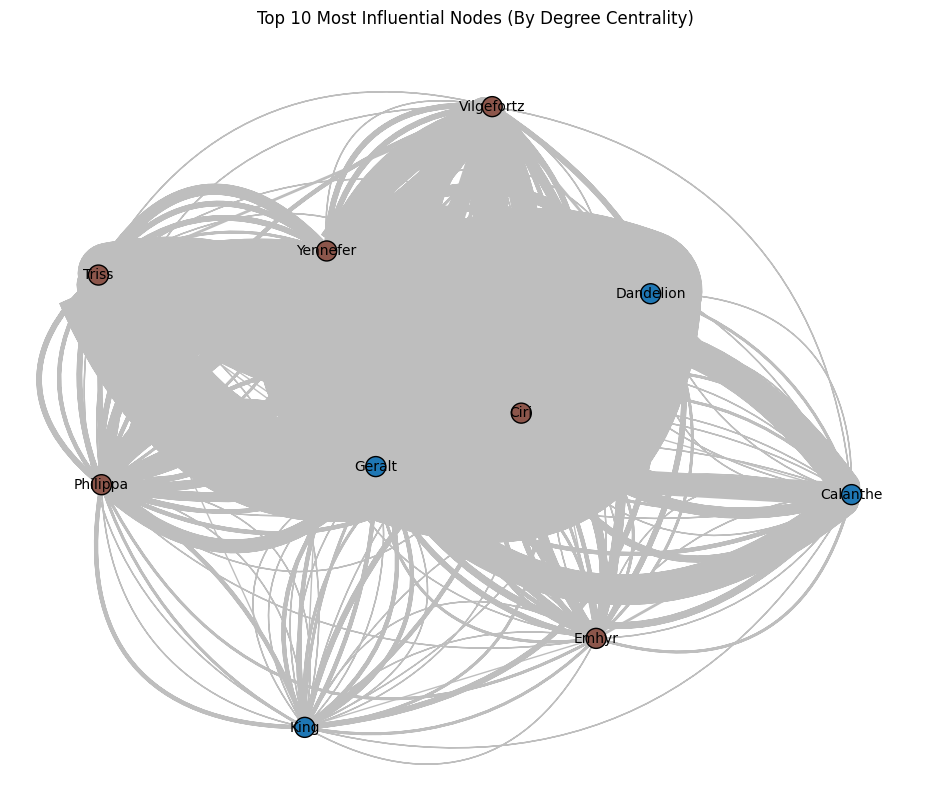

Top 10 Most Influential Nodes by Degree Centrality:
Vertex: Geralt | Degree Centrality: 404
Vertex: Ciri | Degree Centrality: 331
Vertex: Yennefer | Degree Centrality: 208
Vertex: Dandelion | Degree Centrality: 188
Vertex: Emhyr | Degree Centrality: 150
Vertex: Philippa | Degree Centrality: 125
Vertex: Triss | Degree Centrality: 108
Vertex: King | Degree Centrality: 103
Vertex: Vilgefortz | Degree Centrality: 102
Vertex: Calanthe | Degree Centrality: 98


In [81]:
degree_centrality = g.degree()

top_10_nodes = sorted(enumerate(degree_centrality), key=lambda x: x[1], reverse=True)[:10]

top_10_node_ids = [node[0] for node in top_10_nodes]

subgraph = g.subgraph(top_10_node_ids)

subgraph_community = subgraph.community_multilevel(weights=subgraph.es['weight'])
subgraph_membership = subgraph_community.membership
subgraph_colors = [plt.cm.get_cmap("tab20")(i / len(set(subgraph_membership))) for i in subgraph_membership]

layout = subgraph.layout_fruchterman_reingold(niter=1000, start_temp=0.1)

fig, ax = plt.subplots(figsize=(12, 10))

ax.clear()
ig.plot(subgraph, layout=layout, target=ax,
        vertex_size=20, vertex_label_size=10,
        edge_width=subgraph.es['weight'], vertex_color=subgraph_colors,
        edge_color='gray',
        vertex_label=subgraph.vs['name'])

plt.title("Top 10 Most Influential Nodes (By Degree Centrality)")
plt.show()

print("Top 10 Most Influential Nodes by Degree Centrality:")
for idx, degree in top_10_nodes:
    print(f"Vertex: {g.vs[idx]['name']} | Degree Centrality: {degree}")


<ipython-input-82-2e2cd2981e44>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  subgraph_betweenness_colors = [plt.cm.get_cmap("tab20")(i / len(set(subgraph_betweenness_membership))) for i in subgraph_betweenness_membership]


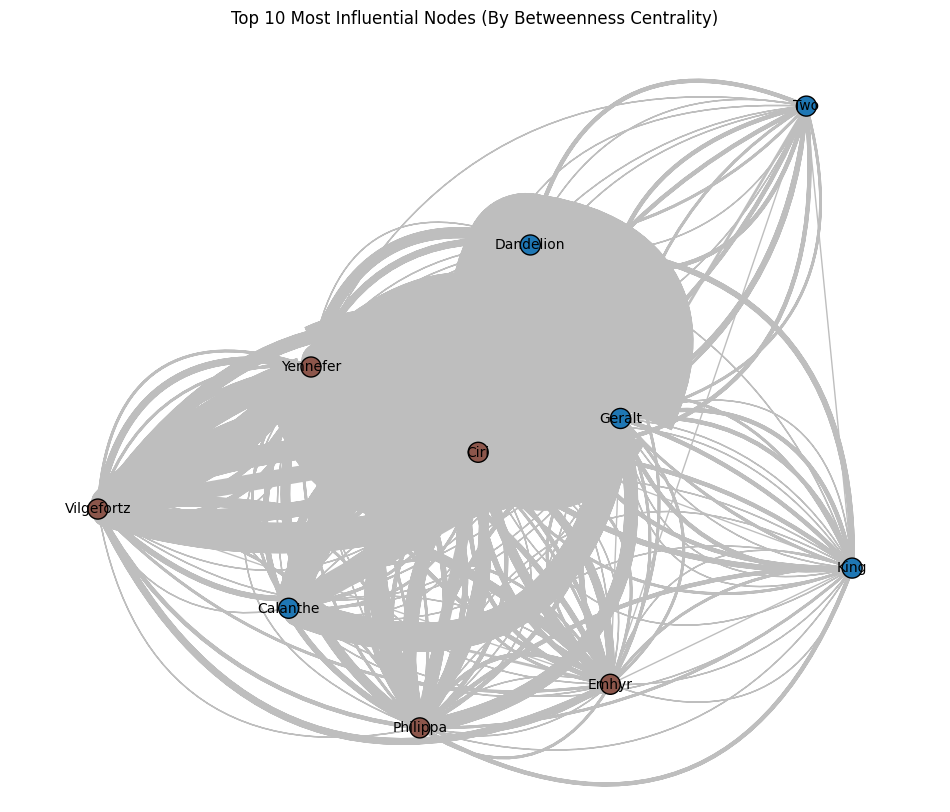

Top 10 Most Influential Nodes by Betweenness Centrality:
Vertex: Geralt | Betweenness Centrality: 10855.175417680346
Vertex: Ciri | Betweenness Centrality: 4726.3767536666355
Vertex: Dandelion | Betweenness Centrality: 1998.4236250745244
Vertex: Yennefer | Betweenness Centrality: 1578.8729671778865
Vertex: Emhyr | Betweenness Centrality: 1373.859854595675
Vertex: Philippa | Betweenness Centrality: 764.8834201668644
Vertex: King | Betweenness Centrality: 681.4502085121048
Vertex: Calanthe | Betweenness Centrality: 645.021800503939
Vertex: Two | Betweenness Centrality: 540.3573245653155
Vertex: Vilgefortz | Betweenness Centrality: 516.3322059592412


In [82]:
betweenness_centrality = g.betweenness()

top_10_betweenness_nodes = sorted(enumerate(betweenness_centrality), key=lambda x: x[1], reverse=True)[:10]

top_10_betweenness_node_ids = [node[0] for node in top_10_betweenness_nodes]

subgraph_betweenness = g.subgraph(top_10_betweenness_node_ids)

subgraph_betweenness_community = subgraph_betweenness.community_multilevel(weights=subgraph_betweenness.es['weight'])
subgraph_betweenness_membership = subgraph_betweenness_community.membership

subgraph_betweenness_colors = [plt.cm.get_cmap("tab20")(i / len(set(subgraph_betweenness_membership))) for i in subgraph_betweenness_membership]

layout_betweenness = subgraph_betweenness.layout_fruchterman_reingold(niter=1000, start_temp=0.1)

fig_betweenness, ax_betweenness = plt.subplots(figsize=(12, 10))

ax_betweenness.clear()
ig.plot(subgraph_betweenness, layout=layout_betweenness, target=ax_betweenness,
        vertex_size=20, vertex_label_size=10,
        edge_width=subgraph_betweenness.es['weight'], vertex_color=subgraph_betweenness_colors,
        edge_color='gray',
        vertex_label=subgraph_betweenness.vs['name'])

plt.title("Top 10 Most Influential Nodes (By Betweenness Centrality)")

plt.show()

print("Top 10 Most Influential Nodes by Betweenness Centrality:")
for idx, bc in top_10_betweenness_nodes:
    print(f"Vertex: {g.vs[idx]['name']} | Betweenness Centrality: {bc}")


In [83]:
density = g.density()
print(f"Network Density: {density:.4f}")

try:
    diameter = g.diameter()
    avg_path_length = g.average_path_length()
    print(f"Network Diameter: {diameter}")
    print(f"Average Path Length: {avg_path_length:.4f}")
except Exception as e:
    print(f"Error calculating diameter or average path length: {e}")

Network Density: 0.1041
Network Diameter: 5
Average Path Length: 2.3672
